In [79]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
from skimage.feature import canny
from scipy.stats import mode

import matplotlib.pyplot as plt
from glob import glob
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.util import crop
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image
from skimage.measure import label, regionprops
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.util import invert

In [80]:
def plot_image(img):
    
    plt.figure(figsize = (10, 10))
    plt.imshow(img, cmap=plt.cm.gray)

    
def binarize_image(image_array):
    return image_array > threshold_otsu(image_array)

In [82]:
def is_vertical_image(image):
    
    alt, lrg, _ = image.shape
    
    if alt > lrg:
        return True
    return False

In [83]:
def rotate_image(image):
    
    HORIZONTAL_REVERZED = 270
    HORIZONTAL_ALIGNED = 90

    return rotate(image,
                  HORIZONTAL_ALIGNED,
                  resize=True)

In [102]:
def crop_image_roi(image):
    
    # Padding dos limites de borda
    safe_zone_pixel = 5
    
    # Gerando Mask

    image_bin = binarize_image(image)

    image_mask = np.invert(convex_hull_image(image_bin == 0))

    # Contornando limites
    label_img = label(image_mask == 0)

    region, *_ = regionprops(label_img)
    
    minr, minc, maxr, maxc = region.bbox

    # Cortando o ROI
    return image[minr - safe_zone_pixel:
                 maxr + safe_zone_pixel,
                 minc - safe_zone_pixel: 
                 maxc + safe_zone_pixel]

# Antes

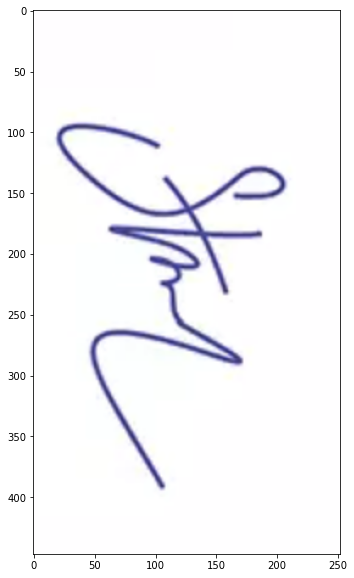

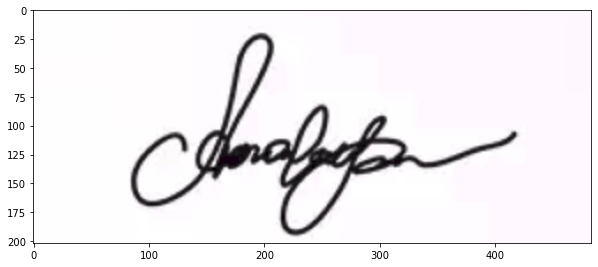

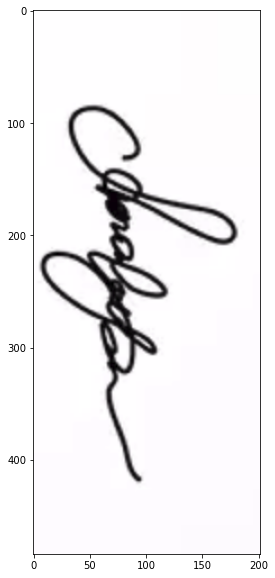

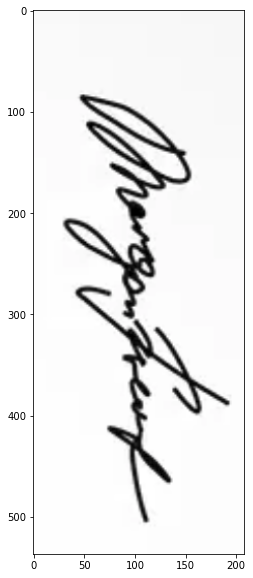

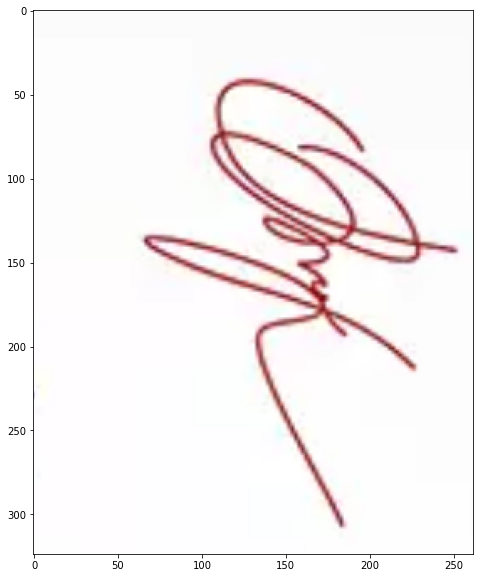

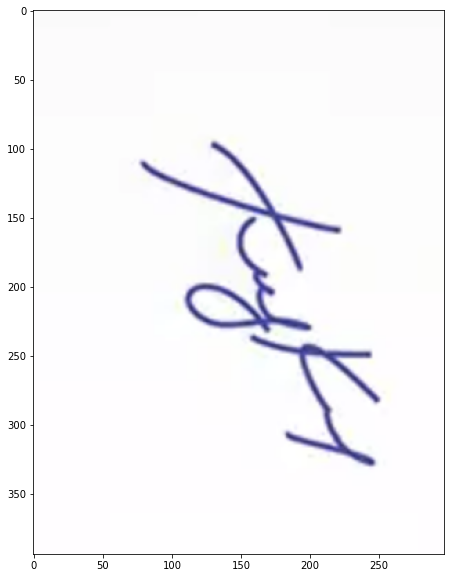

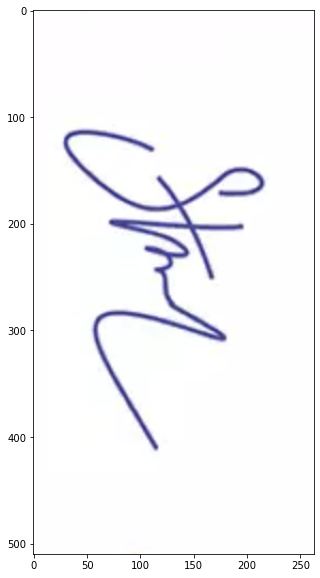

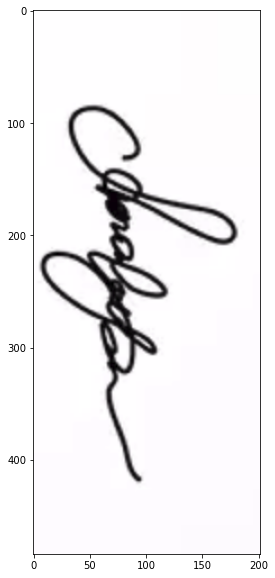

In [108]:
for index in glob('images/*.png'):
    
    image = imread(index)
    
    plot_image(image)

# Aplicando

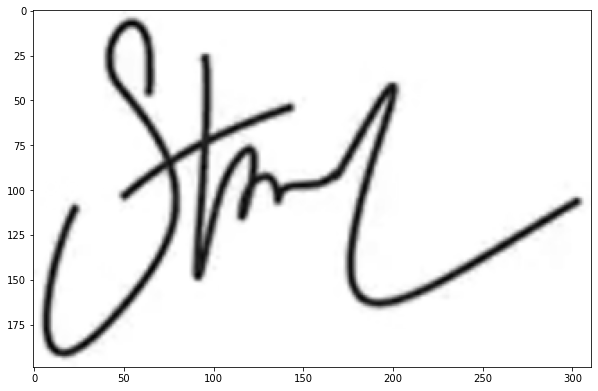

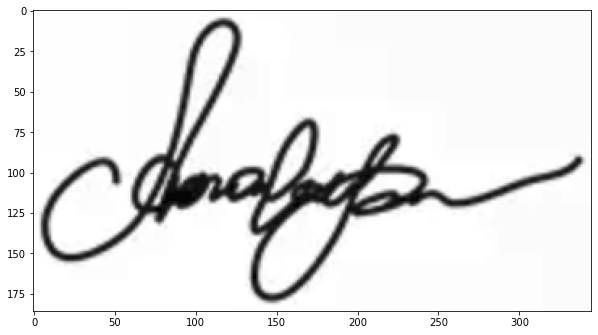

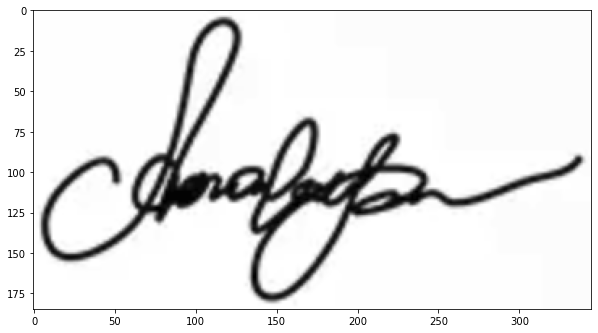

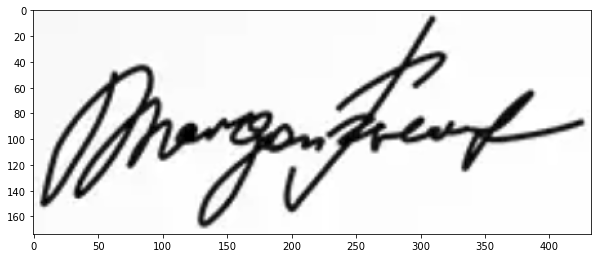

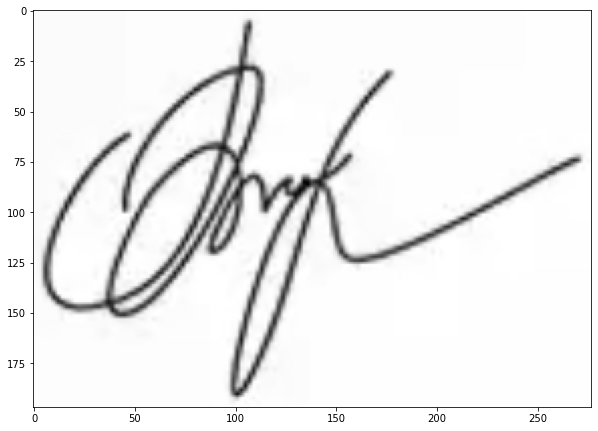

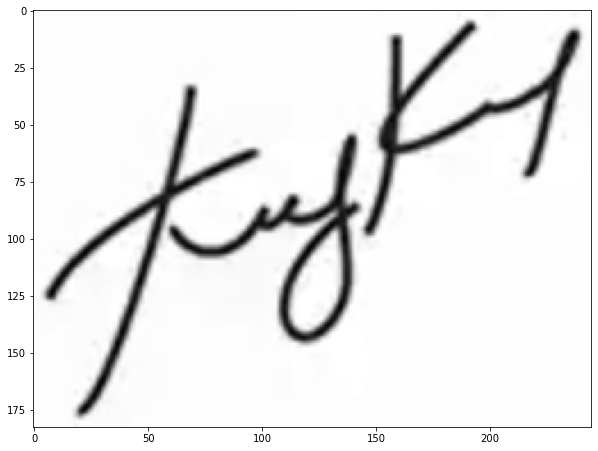

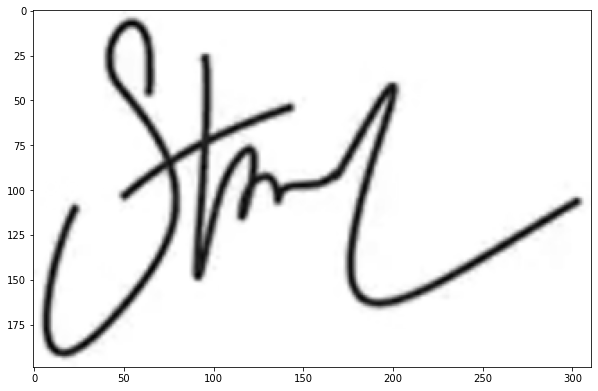

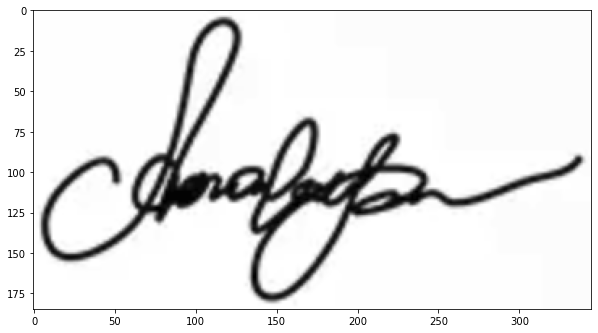

In [109]:
for index in glob('images/*.png'):
    
    image = imread(index)
    
    is_vertical = is_vertical_image(image)
    
    if(is_vertical):
        image = rotate_image(image)
    
    image = rgb2gray(image)
    
    image = crop_image_roi(image)
    
    plot_image(image)